In [1]:
import numpy as np
import pandas as pd

from fancyimpute import MatrixFactorization

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

import os
os.environ["PATH"]+= os.pathsep + 'C:\Program Files (x86)\graphviz-2.38\bin'

%matplotlib inline

Using TensorFlow backend.


In [2]:
cereals=pd.read_excel("Cereals.xls", sheet_name="Data from DASL")
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [3]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       76 non-null float64
sugars      76 non-null float64
potass      75 non-null float64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.7+ KB


In [4]:
cereals=cereals.set_index("name")
cereals.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


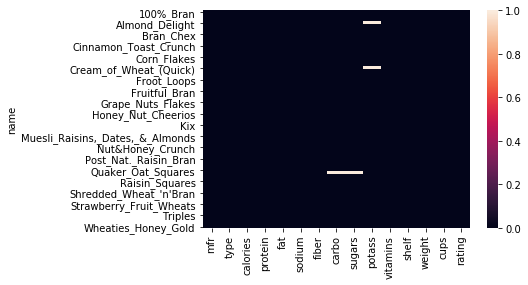

In [5]:
sns.heatmap(cereals.isnull())
plt.show()

In [6]:
X_filled_mf=MatrixFactorization().fit_transform(cereals.iloc[:,2:])
cereals=pd.concat([cereals.iloc[:,:2],pd.DataFrame(X_filled_mf, index=cereals.index, columns=cereals.columns[2:])], axis=1)
cereals.head()








Train on 897 samples, validate on 100 samples
Epoch 1/10000





897/897 [==============================] - 2s 2ms/step - loss: 1.1230 - val_loss: 0.8113
Epoch 2/10000
897/897 [==============================] - 0s 6us/step - loss: 1.1199 - val_loss: 0.8116
Epoch 3/10000
897/897 [==============================] - 0s 6us/step - loss: 1.1176 - val_loss: 0.8119
Epoch 4/10000
897/897 [==============================] - 0s 4us/step - loss: 1.1154 - val_loss: 0.8122
Epoch 5/10000
897/897 [==============================] - 0s 6us/step - loss: 1.1133 - val_loss: 0.8125
Epoch 6/10000
897/897 [==============================] - 0s 6us/step - loss: 1.1111 - val_loss: 0.8129


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.0,1.00,33.983679
All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.0,0.50,93.704912
Almond_Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,60.199917,25.0,3.0,1.0,0.75,34.384843


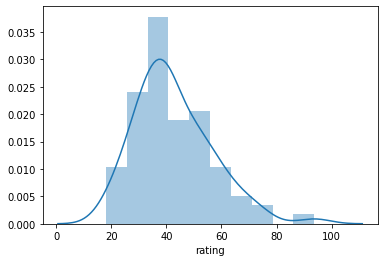

In [7]:
sns.distplot(cereals["rating"])
plt.show()

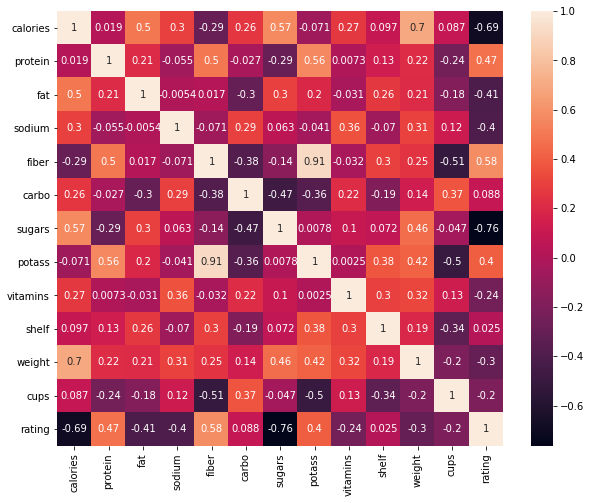

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(cereals.corr(), annot=True)
plt.show()

In [9]:
X=cereals.drop("rating", axis=1)
X=pd.get_dummies(X, drop_first=True)
y=cereals["rating"]

In [10]:
clf_dt = DecisionTreeRegressor(random_state=1011).fit(X, y)
scores = cross_val_score(clf_dt, X, y, cv=5)
scores.mean()

0.6752872277996663

In [11]:
dot_data = export_graphviz(clf_dt, out_file=None,
                                feature_names=X.columns,
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
# graph.render("iris",format="png")

In [12]:
clf_rf = RandomForestRegressor(random_state=1011).fit(X, y)
scores = cross_val_score(clf_rf, X, y, cv=5)
scores.mean()

C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.777616512727894

In [13]:
clf_rf.feature_importances_

array([2.92281858e-01, 5.82253615e-02, 1.39900599e-02, 3.22525065e-02,
       4.17851231e-02, 1.61057683e-02, 3.99956734e-01, 2.71730056e-02,
       1.77765047e-03, 5.12472489e-04, 1.15139354e-03, 4.80838252e-03,
       4.12159533e-03, 2.07869139e-03, 1.02885274e-01, 6.73460032e-04,
       1.58382081e-04, 5.67443369e-05, 5.53631478e-06])

In [14]:
X.columns

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'mfr_G', 'mfr_K',
       'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_H'],
      dtype='object')

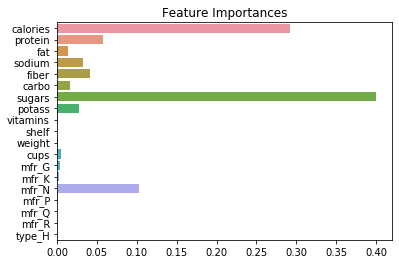

In [15]:
plt.title("Feature Importances")
sns.barplot(clf_rf.feature_importances_, X.columns)
plt.show()

In [16]:
parameters = {'criterion':('mse', 'mae'), 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10] }

In [17]:
clf = GridSearchCV(clf_dt, parameters).fit(X, y)

C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
df=pd.DataFrame(clf.cv_results_)
df=df[["param_criterion", "param_min_samples_split", "params", "mean_test_score"]]
df

,param_criterion,param_min_samples_split,params,mean_test_score
0,mse,2,"{'criterion': 'mse', 'min_samples_split': 2}",0.383476
1,mse,3,"{'criterion': 'mse', 'min_samples_split': 3}",0.392922
2,mse,4,"{'criterion': 'mse', 'min_samples_split': 4}",0.461771
3,mse,5,"{'criterion': 'mse', 'min_samples_split': 5}",0.387125
4,mse,6,"{'criterion': 'mse', 'min_samples_split': 6}",0.376883
5,mse,7,"{'criterion': 'mse', 'min_samples_split': 7}",0.370959
6,mse,8,"{'criterion': 'mse', 'min_samples_split': 8}",0.382463
7,mse,9,"{'criterion': 'mse', 'min_samples_split': 9}",0.394771
8,mse,10,"{'criterion': 'mse', 'min_samples_split': 10}",0.386531
9,mae,2,"{'criterion': 'mae', 'min_samples_split': 2}",0.241856


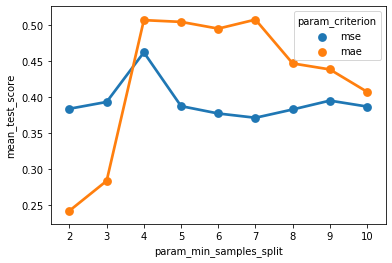

In [19]:
sns.pointplot(data=df, x="param_min_samples_split", y="mean_test_score", hue="param_criterion")
plt.show()

In [20]:
clf.best_params_

{'criterion': 'mae', 'min_samples_split': 7}

In [21]:
clf.best_score_

0.5072456023011587

In [22]:
parameters = {'criterion':('mse', 'mae'), 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], }

In [23]:
clf = GridSearchCV(clf_rf, parameters).fit(X, y)

C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\TAEHYEONG\Anaconda3\envs\DACON\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
df=pd.DataFrame(clf.cv_results_)
df=df[["param_criterion", "param_min_samples_split", "params", "mean_test_score"]]
df

,param_criterion,param_min_samples_split,params,mean_test_score
0,mse,2,"{'criterion': 'mse', 'min_samples_split': 2}",0.718000
1,mse,3,"{'criterion': 'mse', 'min_samples_split': 3}",0.705079
2,mse,4,"{'criterion': 'mse', 'min_samples_split': 4}",0.712540
3,mse,5,"{'criterion': 'mse', 'min_samples_split': 5}",0.692472
4,mse,6,"{'criterion': 'mse', 'min_samples_split': 6}",0.712030
5,mse,7,"{'criterion': 'mse', 'min_samples_split': 7}",0.698810
6,mse,8,"{'criterion': 'mse', 'min_samples_split': 8}",0.698540
7,mse,9,"{'criterion': 'mse', 'min_samples_split': 9}",0.696554
8,mse,10,"{'criterion': 'mse', 'min_samples_split': 10}",0.693914
9,mae,2,"{'criterion': 'mae', 'min_samples_split': 2}",0.658064


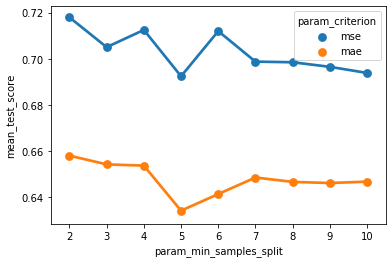

In [25]:
sns.pointplot(data=df, x="param_min_samples_split", y="mean_test_score", hue="param_criterion")
plt.show()

In [26]:
clf.best_params_

{'criterion': 'mse', 'min_samples_split': 2}

In [27]:
clf.best_score_

0.7179998390484889